In [1]:
import rasterio as rs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
timeDat = pd.read_csv("../data/comparison/comparison_notes.txt")
with rs.open("../data/comparison/hydroDEM_diff.tif") as srs:
    diff = srs.read(1)
    nd = srs.nodata
    
diff[diff == nd] = np.NaN
n,m = diff.shape
diff = np.reshape(diff,(1,n*m))
diff = diff[np.isnan(diff)==0]

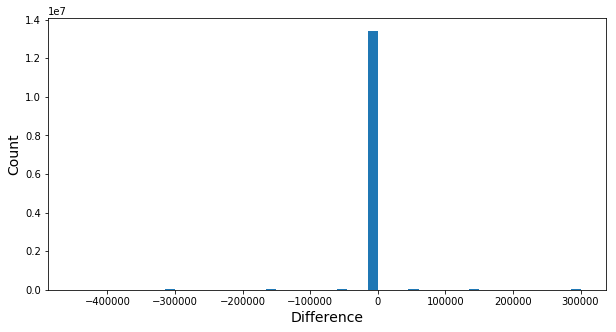

In [3]:
plt.figure(figsize=(10,5))
plt.hist(diff,50);
plt.ylabel("Count", fontsize = 14);
plt.xlabel("Difference", fontsize = 14);
plt.title("Difference in HydroDEM");

In [8]:
with rs.open("../data/comparison/fac_diff.tif") as srs:
    diff = srs.read(1)
    nd = srs.nodata

diff = diff.astype(np.float64)
diff[diff == nd] = np.NaN
n,m = diff.shape
diff = np.reshape(diff,(1,n*m))
diff = diff[np.isnan(diff)==0]

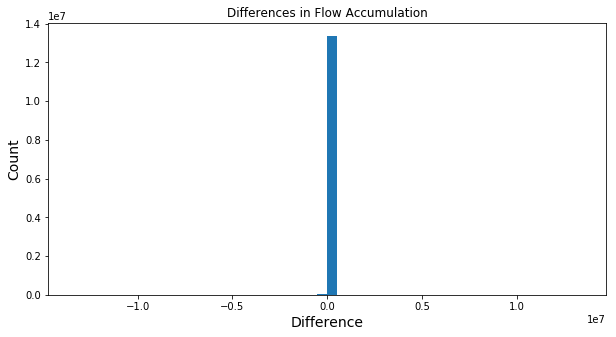

In [14]:
plt.figure(figsize=(10,5))
plt.hist(diff,50);
plt.ylabel("Count", fontsize = 14);
plt.xlabel("Difference", fontsize = 14);
plt.title("Differences in Flow Accumulation");

In [15]:
def get_seconds(time):
    hours = float(time.split(":")[0])
    minutes = float(time.split(":")[1])
    seconds = float(time.split(":")[2])
    
    return (hours*60.*60.) + (minutes*60.) + seconds

In [17]:
timeDat['seconds'] = timeDat['time'].map(get_seconds)

In [18]:
timeDat

,function,version,HUC,time,python,seconds
0,hydroDEM,v4,1080206,00:11:25,py2,685.0
1,hydroDEM,v3.10,1080206,00:15:17,py2,917.0
2,hydroDEM,v4,1080206,00:09:59,py3,599.0


In [19]:
combos = ["v3.10:v4 Python2:Python2","v3.10:v4 Python2:Python3"]
versions = ['v4','v4']
pythons = ['py2','py3']
speedups = []
orig = timeDat.loc[timeDat['version'] == 'v3.10','seconds'].values[0]
for ver, py in zip(versions,pythons):
    execTime = timeDat.loc[(timeDat['version'] == ver) & (timeDat['python'] == py),'seconds'].values[0]
    
    speedups.append(round(orig/execTime,2))

In [20]:
speedups

[1.34, 1.53]

In [21]:
outDat = pd.DataFrame()
outDat['combo'] = combos
outDat['speedup'] = speedups

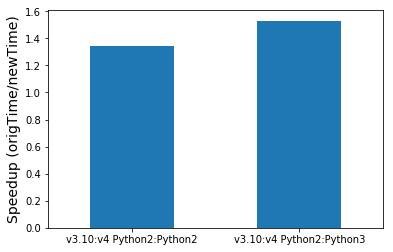

In [23]:
outDat.plot.bar(legend=False)
plt.xticks([0,1],labels=combos, rotation=0);
plt.ylabel('Speedup (origTime/newTime)', fontsize = 14);